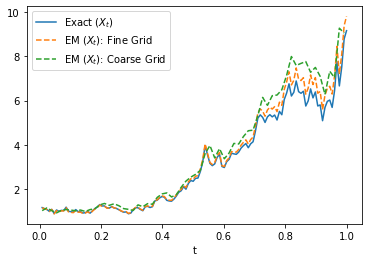

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# SDE model parameters
b, sigma, X0 = 2, 1, 1

# Simulation parameters
T, N = 1, 2**7
dt = 1.0 / N
t = np.arange(dt, 1 + dt, dt)  # Start at dt because Y = X0 at t = 0

# Create Brownian Motion
np.random.seed(1)
dW = np.sqrt(dt) * np.random.randn(N)
W  = np.cumsum(dW)

# Exact Solution
Y = X0 * np.exp((b - 0.5*sigma**2)*t + (sigma * W))

# EM Approximation - small dt
X_em_small, X = [], X0
for j in range(N):  
    X += b*X*dt + sigma*X*dW[j]
    X_em_small.append(X)

# EM Approximation - big dt
X_em_big, X, R = [], X0, 2
coarse_grid = np.arange(dt,1+dt,R*dt)
for j in range(int(N/R)):
    X += b*X* (R*dt) + sigma*X*sum(dW[R*(j-1):R*j])
    X_em_big.append(X)    
    
# Plot
plt.plot(t, Y, label="Exact ($X_t$)")
plt.plot(t, X_em_small, label="EM ($X_t$): Fine Grid", ls='--')
plt.plot(coarse_grid, X_em_big, label="EM ($X_t$): Coarse Grid",  ls='--')
plt.xlabel('t'); plt.legend(loc = 2);

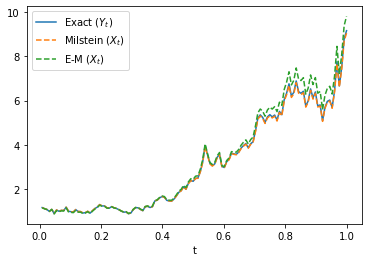

In [5]:
# Milstein Approximation
Xmil, X = [], X0
for j in range(N):  
    X += b*X*dt + sigma*X*dW[j] + 0.5*sigma**2 * X * (dW[j] ** 2 - dt)
    Xmil.append(X)
    
# Plot
plt.plot(t, Y, label="Exact ($Y_t$)")
plt.plot(t, Xmil, label="Milstein ($X_t$)",ls='--')
plt.plot(t, X_em_small, label="E-M ($X_t$)",ls='--')
plt.xlabel('t'); plt.legend(loc=2);